# ECE-GY 6143 HW8
## Guandong Kou (gk1675)

In [1]:
run styles.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Problem 1

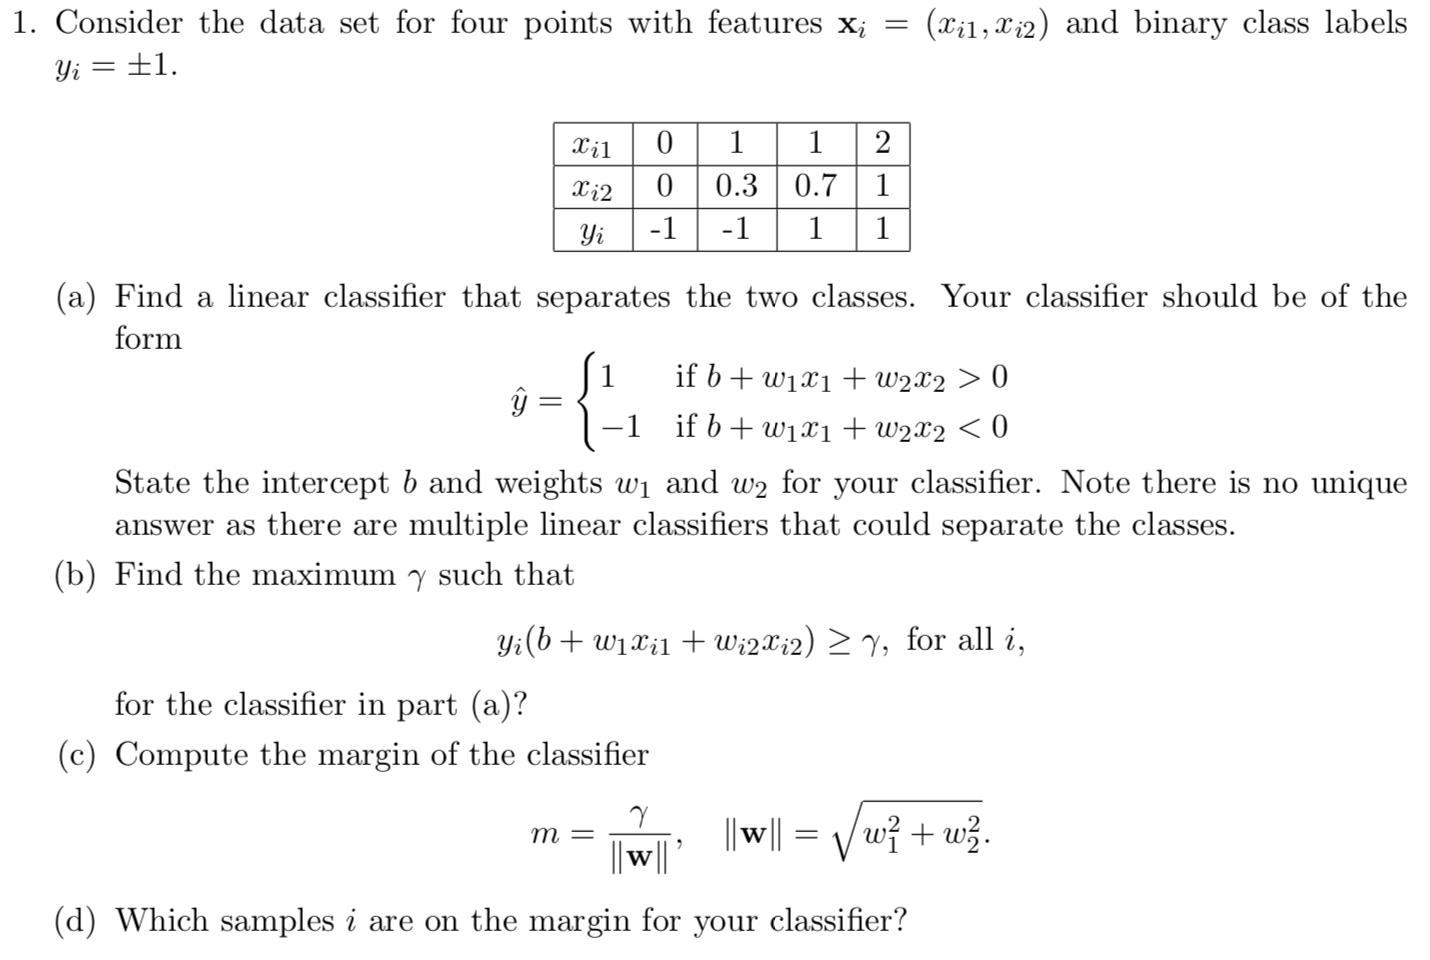

### 1a)
$ x_2 - 0.5 = 0 $ can be a good classifier. The intercept $b$ is -0.5, $w_1 = 0, w_2 = 1$

### 1b)

In [3]:
X = np.array([[0, 0], [1, 0.3], [1, 0.7], [2,1]])
y = np.array([-1, -1, 1, 1])
w = np.array([0, 1])
b = -0.5

In [4]:
distances = np.array(y*(X.dot(w) + b), dtype=np.float16)
print(distances)

[0.5 0.2 0.2 0.5]


Obviously, $\gamma = 0.2$

### 1c)

In [5]:
gamma = 0.2
m = gamma / np.linalg.norm(w)
print('margin m is: ', m)

margin m is:  0.2


### 1d)

In [7]:
X[np.argwhere(distances == m)]

array([[[1. , 0.3]],

       [[1. , 0.7]]])

The above two samples are on the margin.

## Problem 2

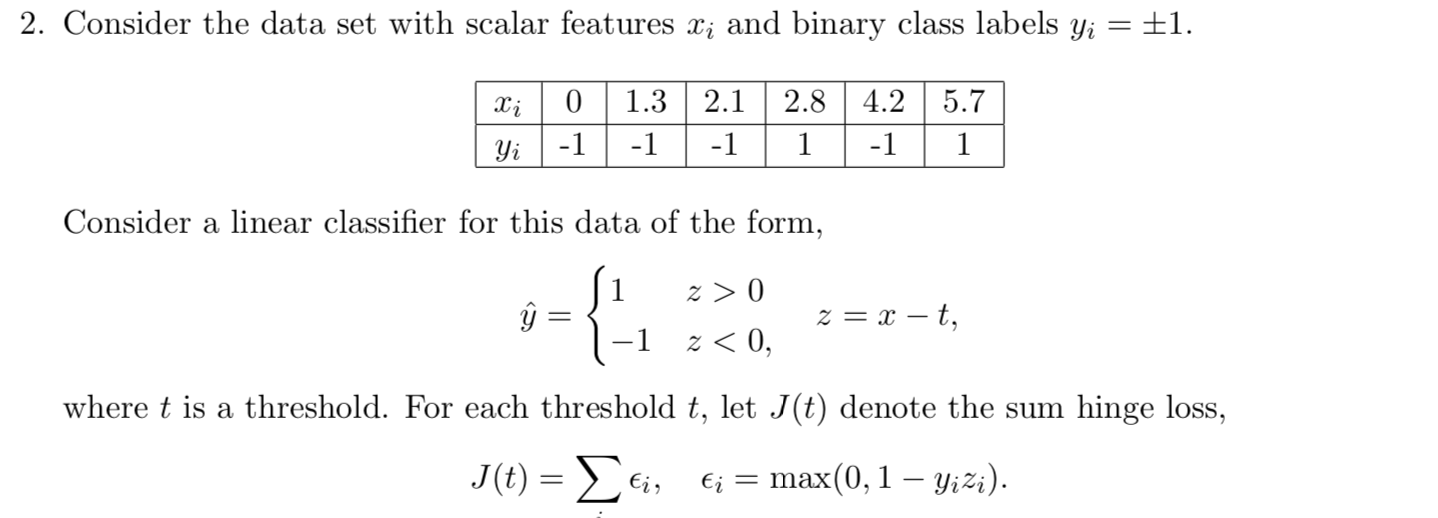

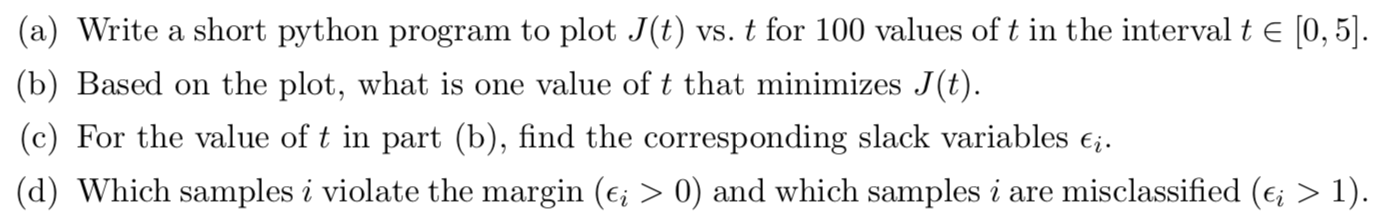

### 2a)

In [8]:
X = np.array([0, 1.3, 2.1, 2.8, 4.2, 5.7])
y = np.array([-1, -1, -1, 1, -1, 1])

In [9]:
def get_J(t):
    z = X[:, None] - t[None, :]
    yz = z * y[:, None]
    loss = 1 - yz
    loss[loss < 0] = 0
    return np.sum(loss, axis=0), loss

In [10]:
t = np.linspace(0, 5, 100)
J, loss = get_J(t)

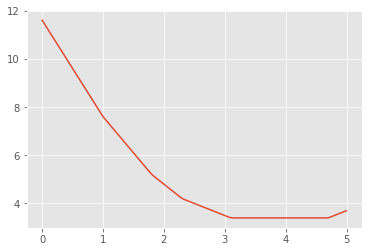

In [11]:
plt.plot(t, J)

### 2b)
The value of t that minimizes J:

In [12]:
idx_min = J.argmin()

In [13]:
t[idx_min]

3.131313131313131

### 2c)

In [14]:
slack = loss[:, idx_min]

In [15]:
print(slack)

[0.         0.         0.         1.33131313 2.06868687 0.        ]


### 2d)

In [16]:
print('samples that violated the margin:\n', X[np.argwhere(slack>0)])

samples that violated the margin:
 [[2.8]
 [4.2]]


In [17]:
print('samples that violated the are misclassified:\n', X[np.argwhere(slack>1)])

samples that violated the are misclassified:
 [[2.8]
 [4.2]]


## Problem 3

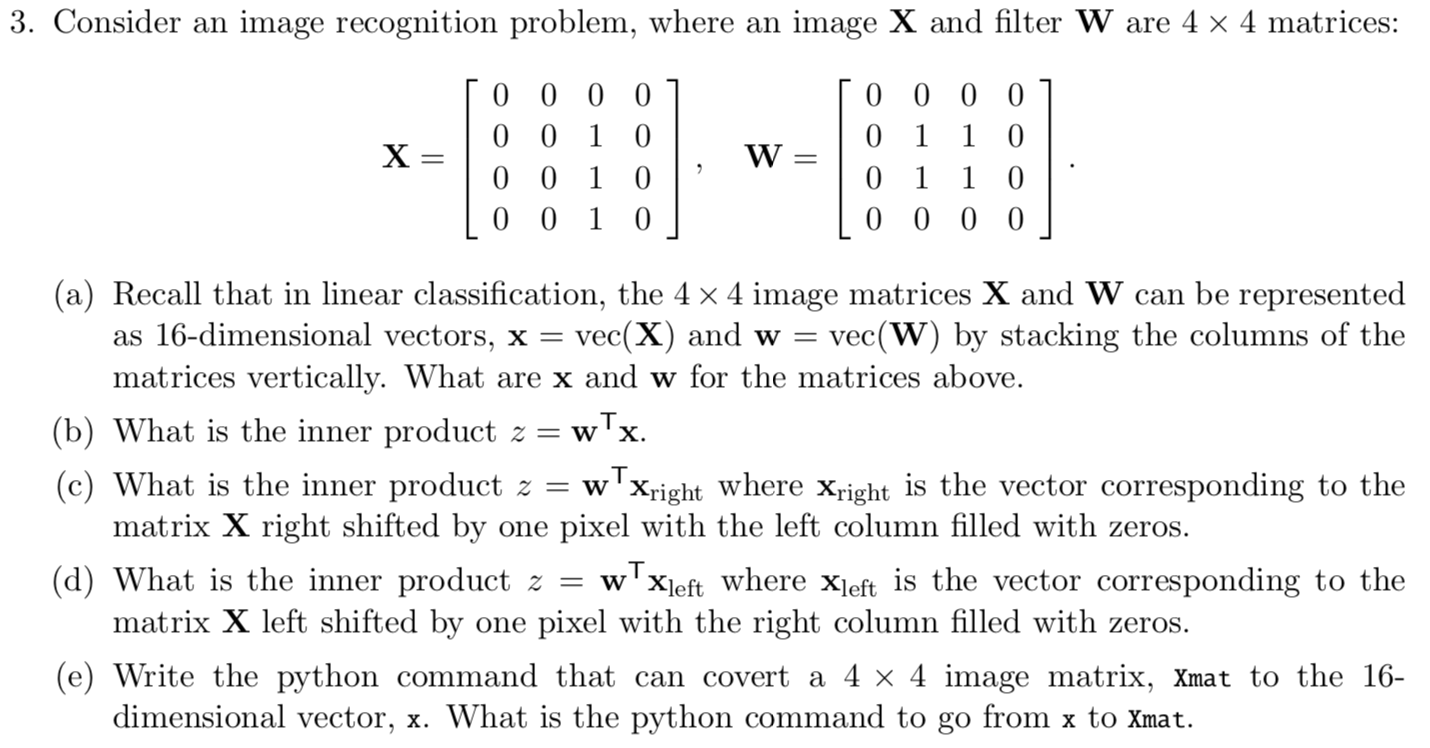

### 3a)

In [18]:
X = np.zeros((4,4))
X[1][2] = X[2][2] = X[3][2] = 1

In [19]:
W = np.zeros((4,4))
W[1][1] = W[1][2] = W[2][1] = W[2][2] = 1

In [20]:
x = X.reshape(X.size, 1)
w = W.reshape(W.size, 1)

In [21]:
x

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [22]:
w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### 3b)

In [23]:
w.T.dot(x)

array([[2.]])

### 3c)

In [24]:
x_right = np.hstack((X[:, 1:], np.zeros((X.shape[0], 1)))).reshape(X.size, 1)

In [25]:
x_right

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [26]:
w.T.dot(x_right)

array([[2.]])

### 3d)

In [27]:
x_left = np.hstack((np.zeros((X.shape[0], 1)), X[:, :-1])).reshape(X.size, 1)

In [28]:
x_left

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [29]:
w.T.dot(x_left)

array([[0.]])

### 3e)

(4,4) to (16, 1): X.reshape(X.size, 1)   

In [30]:
X.reshape(X.size, 1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

(16, 1) to (4, 4): x.reshape(X.shape)   

In [31]:
x.reshape(X.shape)

array([[0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

## Problem 4

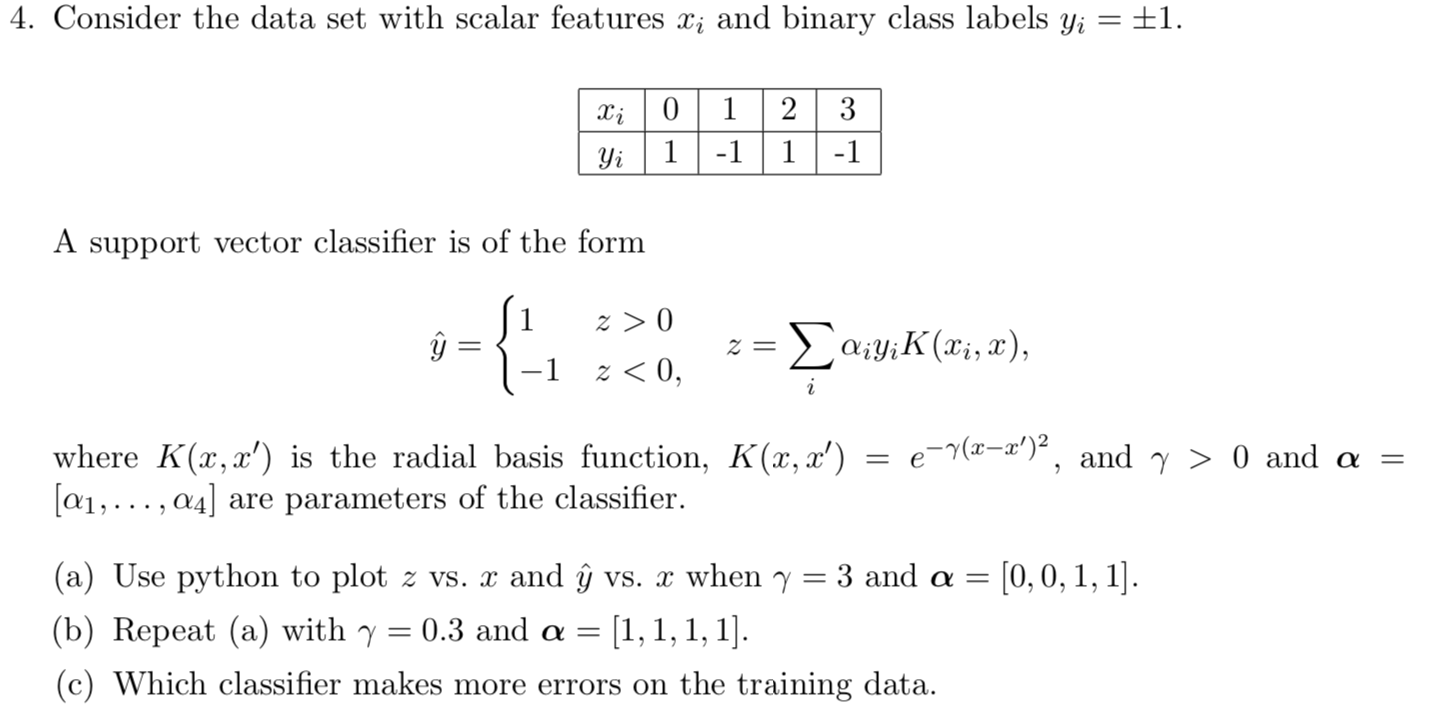

### 4a)

In [32]:
X = np.array([0, 1, 2, 3])
y = np.array([1, -1, 1, -1])

In [33]:
def get_yhat_z(gamma, alpha):
    K = np.exp(-gamma * (X[:, None] - X[None, :])**2)
    z = np.sum(alpha[:, None] * K * y[:, None], axis=0)
    y_hat = 2*(z>0).astype(int) - 1
    return y_hat, z

In [34]:
def plot(gamma, alpha):
    y_hat, z = get_yhat_z(gamma, alpha)
    plt.figure(figsize=(10, 4))
    fig, ax = plt.subplots(1, 2)
    ax[0].scatter(X, z)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('z')
    ax[1].scatter(X, y_hat)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y_hat')
    plt.show()
    return y_hat, z

In [35]:
gamma = 3
alpha = np.array([0, 0, 1, 1])

<Figure size 720x288 with 0 Axes>

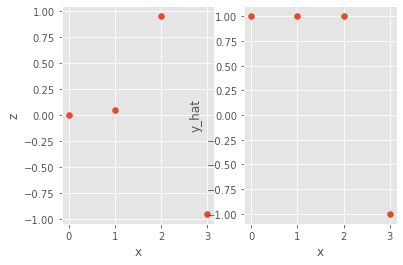

In [36]:
y_hat, z = plot(gamma, alpha)

Accuracy: 

In [37]:
np.mean(y_hat == y)

0.75

### 4b)

In [38]:
gamma = 0.3
alpha = np.array([1, 1, 1, 1])

<Figure size 720x288 with 0 Axes>

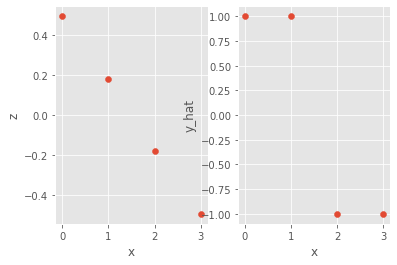

In [39]:
y_hat, z = plot(gamma, alpha)

In [40]:
np.mean(y_hat == y)

0.5

### 4c)

The model in 4b) makes more errors with accuracy 0.5, which is lower than 4a) of 0.75.

The souce code of this Jupyter Notebook will be uploaded to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_6143_Machine_Learning).